## Importing libreries and changing their name


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [553]:
data=pd.read_csv('/content/drive/My Drive/project/Dataset/Company Stock.csv')# read the.csv file with the help of .read_function

In [554]:
data.head(5)

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [555]:
data.tail(5)

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
1979,09-11-2017,0.005984,0.000623,-0.002043,-0.003310
1980,10-11-2017,-0.007173,-0.000389,-0.006880,-0.003348
1981,13-11-2017,0.000352,-0.004944,-0.004008,0.003395
1982,14-11-2017,-0.019376,-0.002621,-0.015118,0.006793
1983,15-11-2017,-0.007006,0.005963,-0.013190,-0.008928


In [556]:
data.shape#Check the Shape

(1984, 5)

In [557]:
data.isnull().sum()# To Check The NULL Value 

Date                       0
Oil Investments            0
Gold Investments           0
Comp Stock                 0
Other sharesInvestments    0
dtype: int64

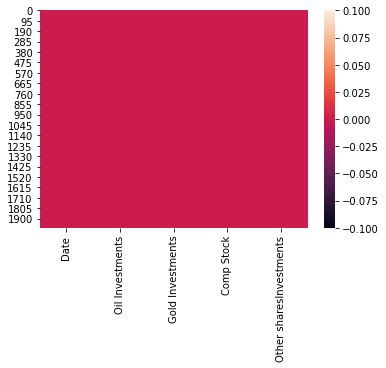

In [558]:
import seaborn as sns
sns.heatmap(data.isnull())

In [559]:
data.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,31-12-2009,0.025417,0.000150,0.017354,0.006848
1,04-01-2010,0.026830,0.001097,0.015565,-0.004609
2,05-01-2010,0.002699,0.001560,0.001729,0.005900
3,06-01-2010,0.021688,0.006009,-0.015906,-0.018116
4,07-01-2010,-0.006256,0.000221,-0.001849,-0.017013


In [560]:
data.drop('Other sharesInvestments',axis='columns', inplace=True)#Drop The Column That Are Not Using in The Time Series 

In [561]:
data.head()

,Date,Oil Investments,Gold Investments,Comp Stock
0,31-12-2009,0.025417,0.000150,0.017354
1,04-01-2010,0.026830,0.001097,0.015565
2,05-01-2010,0.002699,0.001560,0.001729
3,06-01-2010,0.021688,0.006009,-0.015906
4,07-01-2010,-0.006256,0.000221,-0.001849


# Split The DataFrame 

In [562]:
df1=data['Date']

In [563]:
df1=pd.DataFrame(df1)

In [564]:
df1.head(4)

,Date
0,31-12-2009
1,04-01-2010
2,05-01-2010
3,06-01-2010


In [565]:
df1.reset_index(drop=True, inplace=True)

For Oil Invesment 

In [566]:
df2=data['Oil Investments']

In [567]:
df2=pd.DataFrame(df2)

In [568]:
df2.head()

,Oil Investments
0,0.025417
1,0.026830
2,0.002699
3,0.021688
4,-0.006256


In [569]:
df2.reset_index(drop=True, inplace=True)#Reset The Index

In [570]:
data1=pd.concat([df1,df2],axis=1)#Concatination the Date With the Oil invesments  

In [571]:
data1.head()

,Date,Oil Investments
0,31-12-2009,0.025417
1,04-01-2010,0.026830
2,05-01-2010,0.002699
3,06-01-2010,0.021688
4,07-01-2010,-0.006256


In [572]:
data1.shape#To Check The Shape Of Oil Invesments Dataset 

(1984, 2)

In [573]:
# Convert Month into Datetime
data1['Date']=pd.to_datetime(data1['Date'])#Convert The Date_index Format 

In [574]:
data1.head()

,Date,Oil Investments
0,2009-12-31,0.025417
1,2010-04-01,0.026830
2,2010-05-01,0.002699
3,2010-06-01,0.021688
4,2010-07-01,-0.006256


In [575]:
data1.describe()

,Oil Investments
count,1984.000000
mean,-0.000435
std,0.030869
min,-1.000000
25%,-0.011021
50%,0.000277
75%,0.010734
max,0.119511


In [576]:
data1.groupby('Date')['Oil Investments'].sum().reset_index()#Grouping The Multiple Date With the help of GrooupBy Clause For grouping sales according to Order Date
# min and max values of Order Date
print(data1['Date'].min())
print(data1['Date'].max())

2009-12-31 00:00:00
2017-12-10 00:00:00


In [577]:
data1 = data1.set_index('Date')#Set The Index Of Dataset  
data1.index

DatetimeIndex(['2009-12-31', '2010-04-01', '2010-05-01', '2010-06-01',
               '2010-07-01', '2010-08-01', '2010-11-01', '2010-12-01',
               '2010-01-13', '2010-01-14',
               ...
               '2017-02-11', '2017-03-11', '2017-06-11', '2017-07-11',
               '2017-08-11', '2017-09-11', '2017-10-11', '2017-11-13',
               '2017-11-14', '2017-11-15'],
              dtype='datetime64[ns]', name='Date', length=1984, freq=None)

In [578]:
# Average the daily Oil Invesments value for each month 
# Use start of each month as the timestamp
y = data1['Oil Investments'].resample('MS').mean()
y['2017':]

Date
2017-01-01   -0.000758
2017-02-01   -0.003942
2017-03-01   -0.039716
2017-04-01   -0.005378
2017-05-01    0.004049
2017-06-01    0.001490
2017-07-01    0.000127
2017-08-01   -0.005920
2017-09-01    0.001623
2017-10-01    0.004610
2017-11-01    0.005893
2017-12-01    0.002337
Freq: MS, Name: Oil Investments, dtype: float64

In [579]:
y.head(5)

Date
2009-12-01    0.025417
2010-01-01   -0.001387
2010-02-01    0.010843
2010-03-01    0.004560
2010-04-01   -0.003055
Freq: MS, Name: Oil Investments, dtype: float64

In [580]:
y=pd.DataFrame(y)#Converet into the New DataFrame 

In [581]:
y.head(5)

,Oil Investments
Date,
2009-12-01,0.025417
2010-01-01,-0.001387
2010-02-01,0.010843
2010-03-01,0.004560
2010-04-01,-0.003055


# Data Visualization

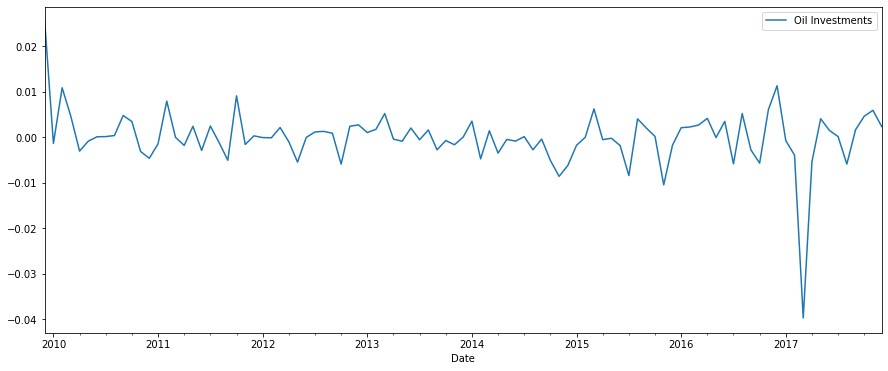

In [582]:
y.plot(figsize = (15, 6))
plt.show()

**Time-series decompositon** 

It allows us to decompose our time series into three distinct components
*   Trend
*   Seasonality
*   Noise





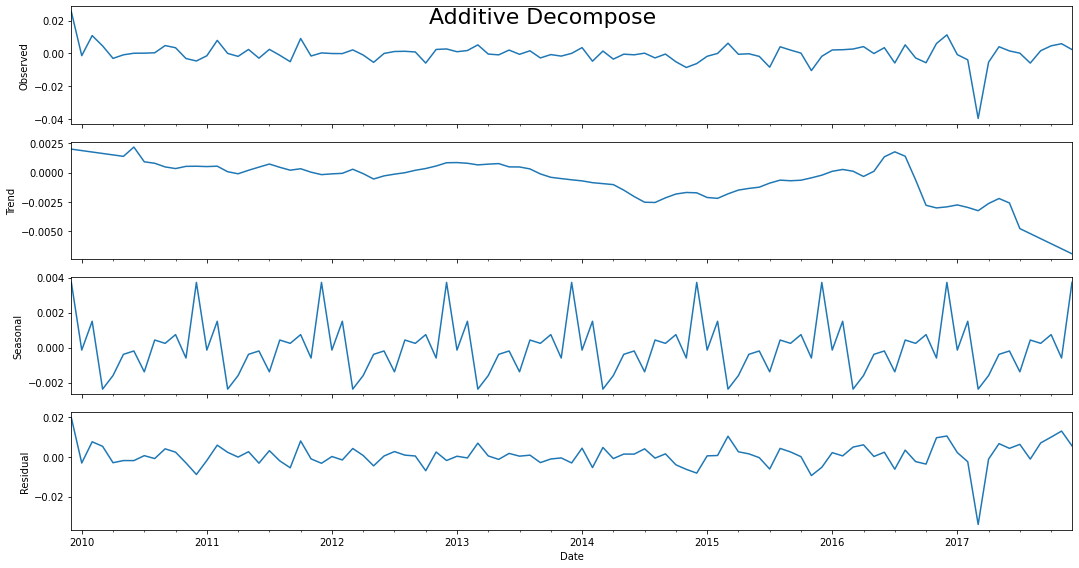

In [583]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
result_add = sm.tsa.seasonal_decompose(y['Oil Investments'], model = 'additive',extrapolate_trend='freq')
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [584]:
#Reconstruct it For Seas,Trend,Res
df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
df_reconstructed.columns = ['Seas', 'Trend', 'Resid', 'Actual_values']
df_reconstructed.head()#Doubt

,seas,trend,resid,actual_values
Date,,,,
2009-12-01,0.003720,0.001999,0.019698,0.025417
2010-01-01,-0.000139,0.001876,-0.003123,-0.001387
2010-02-01,0.001504,0.001753,0.007586,0.010843
2010-03-01,-0.002367,0.001630,0.005297,0.004560
2010-04-01,-0.001593,0.001506,-0.002969,-0.003055


In [585]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [586]:
test_result=adfuller(y['Oil Investments']) # adfuller give us 5 values

In [587]:
# just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-7.056153770519269, 5.368781554197672e-10, 2, 94, {'1%': -3.5019123847798657, '5%': -2.892815255482889, '10%': -2.583453861475781}, -626.1096183823222)


For P-Value

In [588]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [589]:
adfuller_test(y['Oil Investments'])

ADF Test Statistic : -7.056153770519269
p-value : 5.368781554197672e-10
#Lags Used : 2
Number of Observations Used : 94
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


For Autocorrelation 

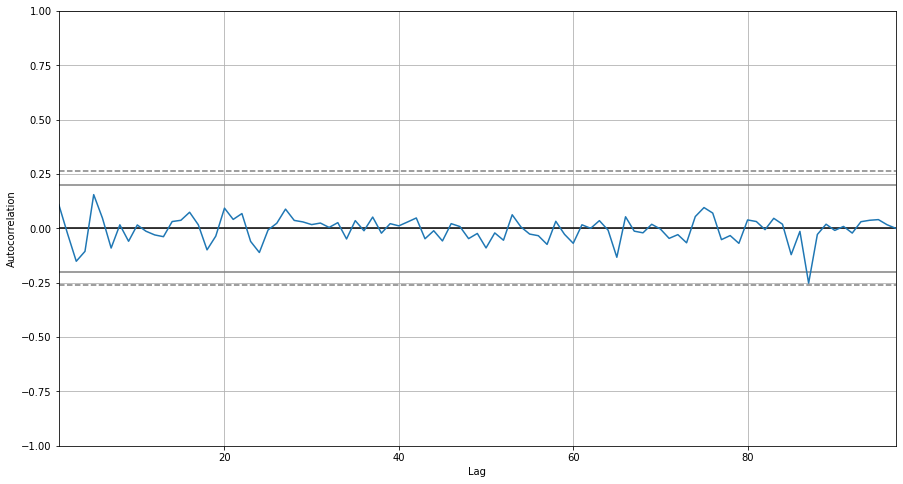

In [590]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(y['Oil Investments'])
plt.show()

ACF FOR MA
PACF FOR AR

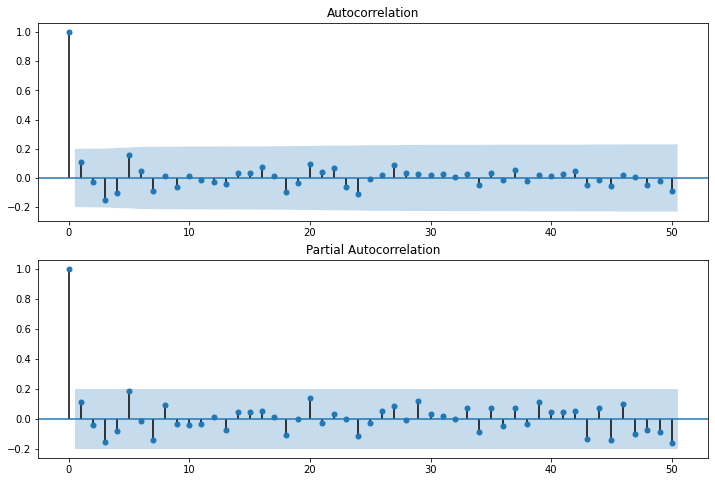

In [591]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# First 12 values are null so we will start from 13
fig = sm.graphics.tsa.plot_acf(y['Oil Investments'],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y['Oil Investments'],lags=50,ax=ax2)

In [592]:
# set the typical ranges for p, d, q
import itertools
p = d = q = range(0, 2)
#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [593]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:-709.6584853326344
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:-708.0189072932616
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-584.1255724478771


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-590.5907847219245
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-707.863624298201
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-709.5871150984688
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-586.5860483077322
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-585.3451294958797
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-709.0510134165727


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-707.3076967975659
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-583.4301848560717
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-585.3994037999577
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-707.1872858938088
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-705.4443660669504


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-586.1992476153214
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-583.6984296088331
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-655.9414864520992
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-653.9023234776058


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-536.8718663236506


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-542.756581838419


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-653.9447325811578


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-651.9609623664359


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-540.3251977719392


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:-537.0023718801727


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-695.5852295565494
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:-693.8180734772759


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:-570.9555139297896
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:-576.5056573763429


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:-693.7438773737604
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:-691.8916826579555


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:-572.8900534079177


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:-567.4382744871576
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:-709.0298448120675
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:-707.3340682515196
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:-583.2480555404879
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:-589.8622618681023
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:-707.1950112175967
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:-708.9146297963958


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:-585.9593649478088


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:-583.4503502025143
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:-706.1230079996501
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:-704.1971275281885
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:-581.5586800794887
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:-587.9298955725488
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:-704.1376014400122
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:-702.4395600214638


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:-584.24437517879
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:-581.7504548750755
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:-668.7471827277966


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:-666.6006684390279
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:-546.2243471114449


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:-553.1778695432569


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:-666.7819622232566


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:-664.4130496218921
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:-549.3047473103996
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:-545.6550460632404


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:-694.8944332361518


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:-693.0347388589623


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:-570.193404504478


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:-575.1351653479227


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-692.9452529510293


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-691.1167591242965
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:-571.6460019109759
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-568.4579333767937


In [594]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)
model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 0),
                                  seasonal_order = (1, 1, 1, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3538      0.060     -5.903      0.000      -0.471      -0.236
ar.S.L12      -0.5609      0.650     -0.863      0.388      -1.835       0.713
ma.S.L12       0.2850      0.773      0.369      0.712      -1.230       1.800
sigma2      7.903e-05   6.77e-06     11.679      0.000    6.58e-05    9.23e-05


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


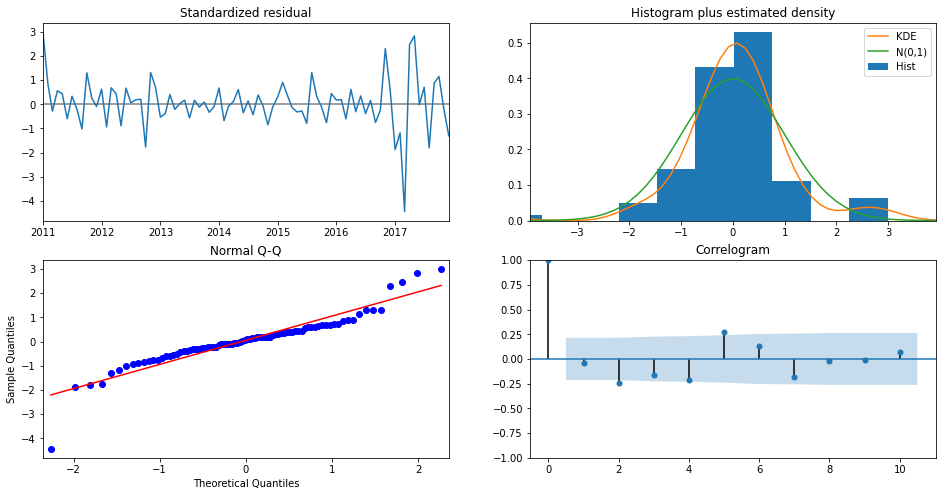

In [595]:
#run model diagnostic to investigate any unusual behavior
result.plot_diagnostics(figsize = (16, 8))
plt.show()

***Validating Forecasts***

To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017–01–01 to the end of the data.

In [596]:
prediction = result.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower Oil Investments,upper Oil Investments
Date,,
2017-01-01,-0.001542,0.033305
2017-02-01,-0.010895,0.023952
2017-03-01,-0.017713,0.017134
2017-04-01,-0.044762,-0.009915
2017-05-01,-0.038509,-0.003661
2017-06-01,-0.015773,0.019074
2017-07-01,-0.023558,0.011290
2017-08-01,-0.007320,0.027527
2017-09-01,-0.023573,0.011274


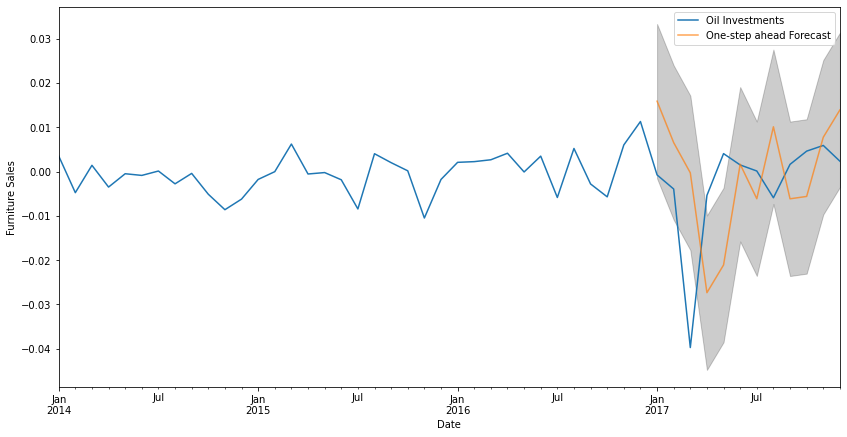

In [597]:
#Visualize the forecasting
ax = y['2014':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

**ERROR ANALYSIS**

In [598]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)
y_hat = prediction.predicted_mean
y_truth = y['2017-01-01':]

mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))#Doubt-2

The Mean Squared Error of our forecasts is 2017-01-01 00:00:00   NaN
2017-02-01 00:00:00   NaN
2017-03-01 00:00:00   NaN
2017-04-01 00:00:00   NaN
2017-05-01 00:00:00   NaN
2017-06-01 00:00:00   NaN
2017-07-01 00:00:00   NaN
2017-08-01 00:00:00   NaN
2017-09-01 00:00:00   NaN
2017-10-01 00:00:00   NaN
2017-11-01 00:00:00   NaN
2017-12-01 00:00:00   NaN
Oil Investments       NaN
dtype: float64
The Root Mean Squared Error of our forecasts is 2017-01-01 00:00:00   NaN
2017-02-01 00:00:00   NaN
2017-03-01 00:00:00   NaN
2017-04-01 00:00:00   NaN
2017-05-01 00:00:00   NaN
2017-06-01 00:00:00   NaN
2017-07-01 00:00:00   NaN
2017-08-01 00:00:00   NaN
2017-09-01 00:00:00   NaN
2017-10-01 00:00:00   NaN
2017-11-01 00:00:00   NaN
2017-12-01 00:00:00   NaN
Oil Investments       NaN
dtype: float64


**Producing and visualizing forecasts**

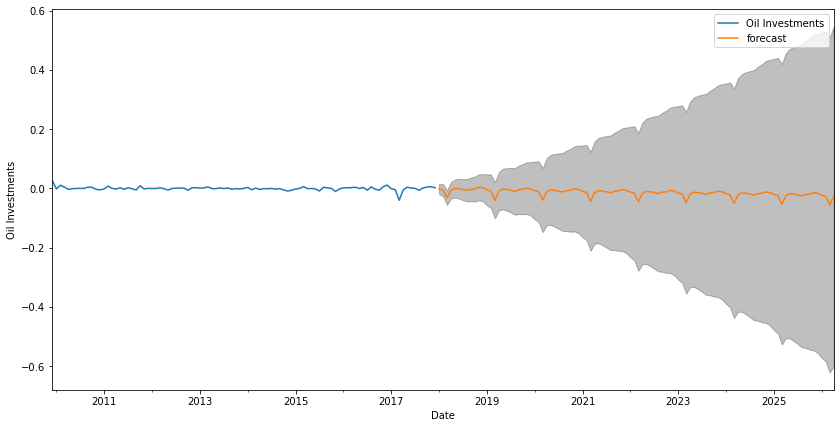

In [599]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Oil Investments')

plt.legend()
plt.show()


# For Gold Invesment

In [600]:
df3=data['Gold Investments']

In [601]:
df3=pd.DataFrame(df3)

In [602]:
df3.head()

,Gold Investments
0,0.000150
1,0.001097
2,0.001560
3,0.006009
4,0.000221


In [603]:
df3.reset_index(drop=True, inplace=True)

In [604]:
data2=pd.concat([df1,df3],axis=1)#START 

In [605]:
data2.head()

,Date,Gold Investments
0,31-12-2009,0.000150
1,04-01-2010,0.001097
2,05-01-2010,0.001560
3,06-01-2010,0.006009
4,07-01-2010,0.000221


In [606]:
data2.shape

(1984, 2)

In [607]:
# Convert Month into Datetime
data2['Date']=pd.to_datetime(data2['Date'])

In [608]:
data2.head()

,Date,Gold Investments
0,2009-12-31,0.000150
1,2010-04-01,0.001097
2,2010-05-01,0.001560
3,2010-06-01,0.006009
4,2010-07-01,0.000221


In [609]:
data2.describe()

,Gold Investments
count,1984.000000
mean,-0.020152
std,0.140965
min,-1.000000
25%,-0.005881
50%,0.000000
75%,0.005454
max,0.049577


In [610]:
data2.groupby('Date')['Gold Investments'].sum().reset_index()
# min and max values of Order Date
print(data2['Date'].min())
print(data2['Date'].max())

2009-12-31 00:00:00
2017-12-10 00:00:00


In [611]:
data2 = data2.set_index('Date')
data2.index

DatetimeIndex(['2009-12-31', '2010-04-01', '2010-05-01', '2010-06-01',
               '2010-07-01', '2010-08-01', '2010-11-01', '2010-12-01',
               '2010-01-13', '2010-01-14',
               ...
               '2017-02-11', '2017-03-11', '2017-06-11', '2017-07-11',
               '2017-08-11', '2017-09-11', '2017-10-11', '2017-11-13',
               '2017-11-14', '2017-11-15'],
              dtype='datetime64[ns]', name='Date', length=1984, freq=None)

In [612]:
x = data2['Gold Investments'].resample('MS').mean()
x['2017':]

Date
2017-01-01   -0.052567
2017-02-01    0.002046
2017-03-01   -0.000212
2017-04-01   -0.062843
2017-05-01    0.001973
2017-06-01    0.000342
2017-07-01    0.001956
2017-08-01   -0.095054
2017-09-01   -0.001363
2017-10-01   -0.000464
2017-11-01   -0.001836
2017-12-01    0.006782
Freq: MS, Name: Gold Investments, dtype: float64

In [613]:
x.head()

Date
2009-12-01    0.000150
2010-01-01   -0.001014
2010-02-01    0.002345
2010-03-01   -0.046637
2010-04-01    0.000616
Freq: MS, Name: Gold Investments, dtype: float64

In [614]:
x=pd.DataFrame(x)

In [615]:
x.head()

,Gold Investments
Date,
2009-12-01,0.000150
2010-01-01,-0.001014
2010-02-01,0.002345
2010-03-01,-0.046637
2010-04-01,0.000616


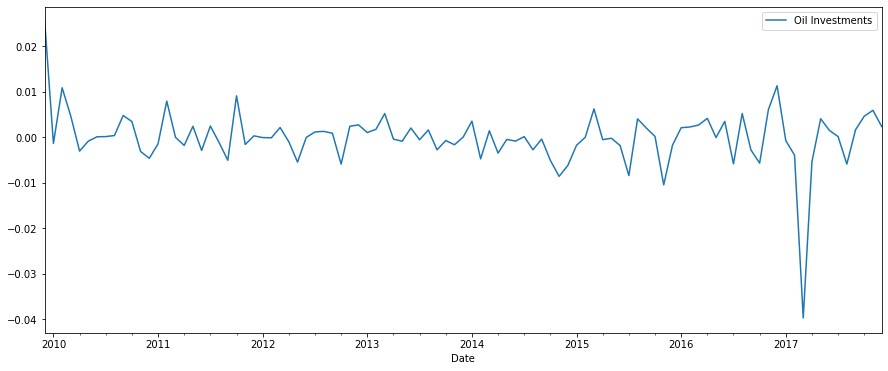

In [616]:
y.plot(figsize = (15, 6))
plt.show()

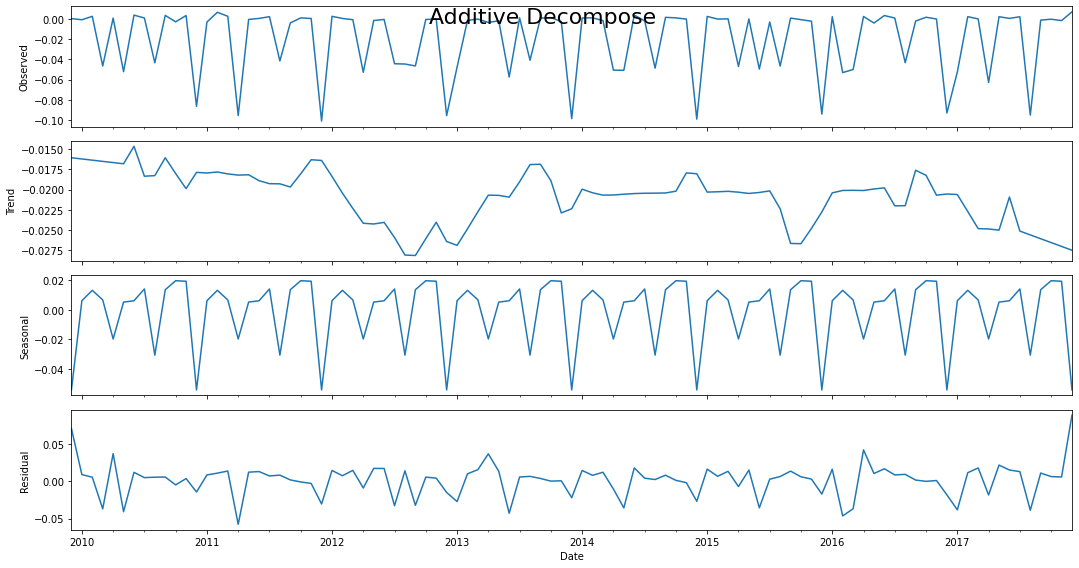

In [617]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
result_add = sm.tsa.seasonal_decompose(x['Gold Investments'], model = 'additive',extrapolate_trend='freq')
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [618]:
df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()#Doubt

,seas,trend,resid,actual_values
Date,,,,
2009-12-01,-0.054260,-0.016072,0.070482,0.000150
2010-01-01,0.006227,-0.016221,0.008980,-0.001014
2010-02-01,0.013256,-0.016370,0.005459,0.002345
2010-03-01,0.006748,-0.016519,-0.036867,-0.046637
2010-04-01,-0.019739,-0.016668,0.037022,0.000616


In [619]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [620]:
test_result=adfuller(x['Gold Investments']) # adfuller give us 5 values

In [621]:
# just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-4.021008399347642, 0.0013044133368528775, 11, 85, {'1%': -3.5097356063504983, '5%': -2.8961947486260944, '10%': -2.5852576124567475}, -365.1382441451886)


In [622]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [623]:
adfuller_test(x['Gold Investments'])

ADF Test Statistic : -4.021008399347642
p-value : 0.0013044133368528775
#Lags Used : 11
Number of Observations Used : 85
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


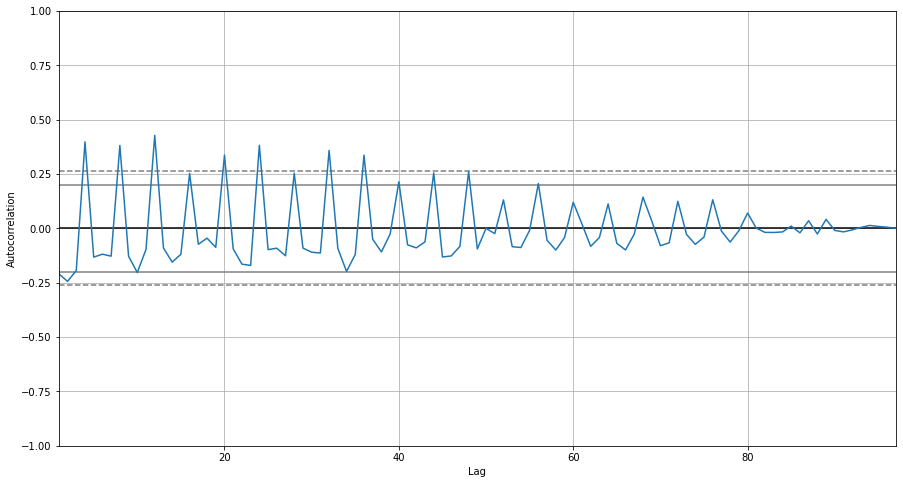

In [624]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(x['Gold Investments'])
plt.show()

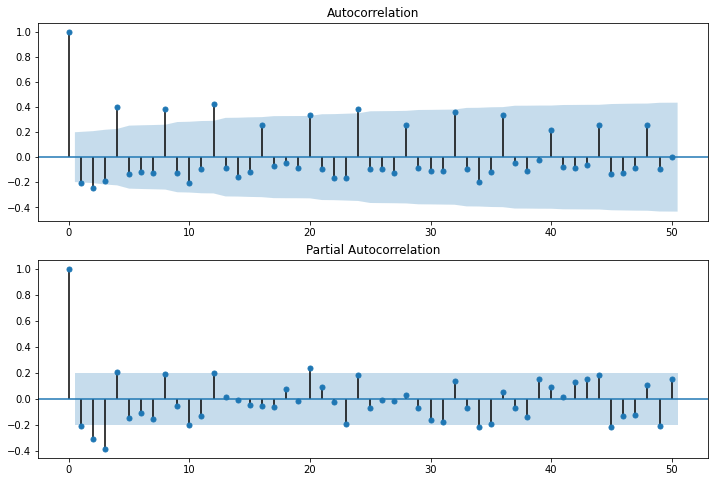

In [625]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# First 12 values are null so we will start from 13
fig = sm.graphics.tsa.plot_acf(x['Gold Investments'],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(x['Gold Investments'],lags=50,ax=ax2)

In [626]:
import itertools
# set the typical ranges for p, d, q
p = d = q = range(0, 2)
#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [627]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(x, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:-360.40402744409
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:-383.95851712600705
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-336.5038172199326
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-364.4152639846999
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-400.8147930854259
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-413.1459661708941
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-351.42907449462706
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-362.9127544874298
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-359.8588998845726
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-381.9591832722128
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-341.49727619174826
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-364.90299161365317
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-399.9682953698072


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-411.8752229934593
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-353.3058220659097
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-362.9266634074778
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-302.90551610442145
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-315.12936195247676
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-264.2979116521323
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-301.7661460273818
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-325.40190774765216
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-343.90205198930636
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-288.9076238473794


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:-304.58121191643716
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-380.6512110488453
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:-393.42635789889846
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:-325.1349473416572
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:-350.67495312643314
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:-401.0886460078957


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:-409.483625496803


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:-339.12381830979666
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:-349.0193323195145
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:-360.1310700674652
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:-381.95929515526984
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:-339.05667194811156
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:-364.2187923435296
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:-399.8897781504471


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:-411.81251707338214
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:-351.51732023643353
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:-362.3313091022738
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:-383.63781781592655


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  (params_trend, params_ar, params_ma,
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:-395.5063446615443
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:-342.36747211754033
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:-366.2597116659305
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:-397.9823143172232


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:-409.757521697216
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:-354.6318426091963


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:-364.27715489559404
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:-326.61857574664737
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:-343.4755402588997
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:-291.1173980939106
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:-324.30039731755244
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:-353.8836024201437


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:-369.7926955859879
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:-306.9100282082631
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:-323.7196897595734
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:-382.57929673334786
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:-396.21644183460535
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:-327.2362415389786
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:-350.2271633816938
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-403.2448058880983


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-409.57666821690486
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:-338.95919718230203
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-348.2820187860084


In [628]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(x, order = (0, 1, 0),
                                  seasonal_order = (0, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0025      0.000      8.055      0.000       0.002       0.003


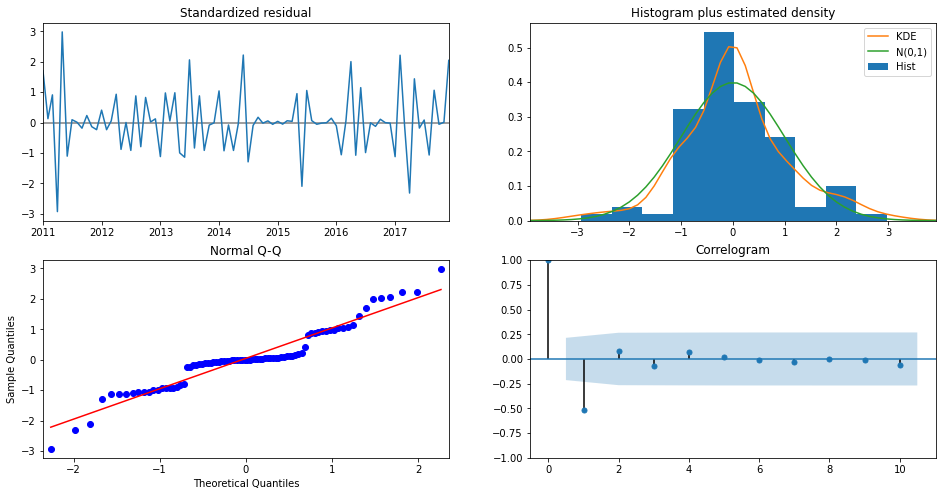

In [629]:
#run model diagnostic to investigate any unusual behavior
result.plot_diagnostics(figsize = (16, 8))
plt.show()

In [630]:
prediction = result.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower Gold Investments,upper Gold Investments
Date,,
2017-01-01,-0.094085,0.100272
2017-02-01,-0.204869,-0.010511
2017-03-01,-0.092107,0.102250
2017-04-01,-0.045062,0.149295
2017-05-01,-0.166471,0.027887
2017-06-01,-0.087806,0.106552
2017-07-01,-0.099325,0.095033
2017-08-01,-0.139271,0.055086
2017-09-01,-0.151148,0.043209


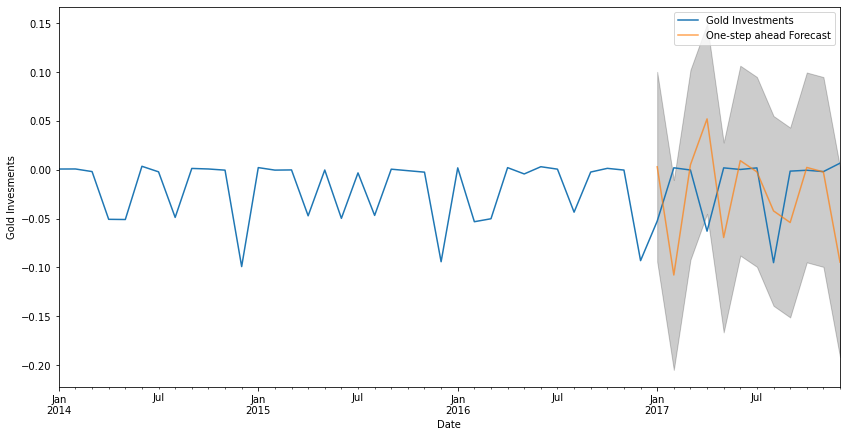

In [631]:
#Visualize the forecasting
ax = x['2014':].plot(label = 'Gold Investments')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Gold Invesments')
plt.legend()
plt.show()

In [632]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)
x_hat = prediction.predicted_mean
x_truth = x['2017-01-01':]

mse = ((x_hat - x_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))#Doubt-2

The Mean Squared Error of our forecasts is 2017-01-01 00:00:00   NaN
2017-02-01 00:00:00   NaN
2017-03-01 00:00:00   NaN
2017-04-01 00:00:00   NaN
2017-05-01 00:00:00   NaN
2017-06-01 00:00:00   NaN
2017-07-01 00:00:00   NaN
2017-08-01 00:00:00   NaN
2017-09-01 00:00:00   NaN
2017-10-01 00:00:00   NaN
2017-11-01 00:00:00   NaN
2017-12-01 00:00:00   NaN
Gold Investments      NaN
dtype: float64
The Root Mean Squared Error of our forecasts is 2017-01-01 00:00:00   NaN
2017-02-01 00:00:00   NaN
2017-03-01 00:00:00   NaN
2017-04-01 00:00:00   NaN
2017-05-01 00:00:00   NaN
2017-06-01 00:00:00   NaN
2017-07-01 00:00:00   NaN
2017-08-01 00:00:00   NaN
2017-09-01 00:00:00   NaN
2017-10-01 00:00:00   NaN
2017-11-01 00:00:00   NaN
2017-12-01 00:00:00   NaN
Gold Investments      NaN
dtype: float64


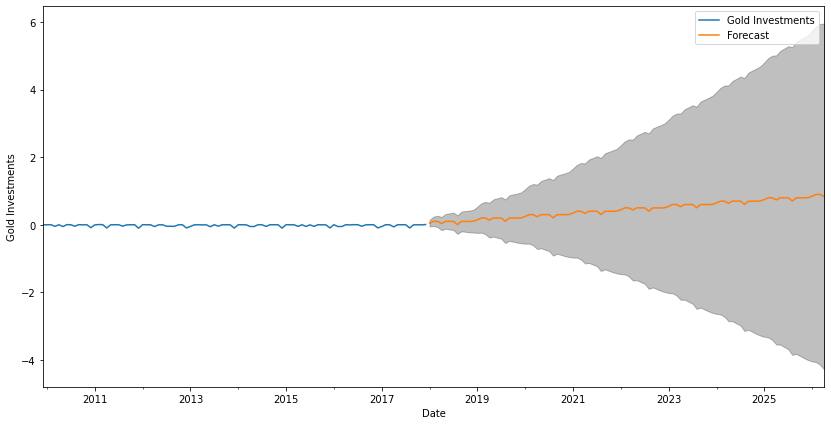

In [633]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()
ax = x.plot(label = 'Gold Investments', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Gold Investments')

plt.legend()
plt.show()


# For Company Stock

In [634]:
df4=data['Comp Stock']

In [635]:
df4=pd.DataFrame(df4)

In [636]:
df4.head()

,Comp Stock
0,0.017354
1,0.015565
2,0.001729
3,-0.015906
4,-0.001849


In [637]:
df4.reset_index(drop=True, inplace=True)

In [638]:
data3=pd.concat([df1,df4],axis=1)

In [639]:
data3.head()

,Date,Comp Stock
0,31-12-2009,0.017354
1,04-01-2010,0.015565
2,05-01-2010,0.001729
3,06-01-2010,-0.015906
4,07-01-2010,-0.001849


In [640]:
data3.shape

(1984, 2)

In [641]:
# Convert Month into Datetime
data3['Date']=pd.to_datetime(data3['Date'])

In [642]:
data3.head()

,Date,Comp Stock
0,2009-12-31,0.017354
1,2010-04-01,0.015565
2,2010-05-01,0.001729
3,2010-06-01,-0.015906
4,2010-07-01,-0.001849


In [643]:
data3.describe()

,Comp Stock
count,1984.000000
mean,0.001007
std,0.016017
min,-0.123558
25%,-0.006926
50%,0.000876
75%,0.009708
max,0.088741


In [644]:
data3.groupby('Date')['Comp Stock'].sum().reset_index()
# min and max values of Order Date
print(data3['Date'].min())
print(data3['Date'].max())

2009-12-31 00:00:00
2017-12-10 00:00:00


In [645]:
data3 = data3.set_index('Date')
data3.index

DatetimeIndex(['2009-12-31', '2010-04-01', '2010-05-01', '2010-06-01',
               '2010-07-01', '2010-08-01', '2010-11-01', '2010-12-01',
               '2010-01-13', '2010-01-14',
               ...
               '2017-02-11', '2017-03-11', '2017-06-11', '2017-07-11',
               '2017-08-11', '2017-09-11', '2017-10-11', '2017-11-13',
               '2017-11-14', '2017-11-15'],
              dtype='datetime64[ns]', name='Date', length=1984, freq=None)

In [646]:
z = data3['Comp Stock'].resample('MS').mean()
z['2017':]

Date
2017-01-01    0.006245
2017-02-01    0.005691
2017-03-01    0.002482
2017-04-01    0.000918
2017-05-01   -0.000506
2017-06-01    0.000376
2017-07-01    0.002865
2017-08-01    0.003141
2017-09-01   -0.002722
2017-10-01    0.001904
2017-11-01    0.000621
2017-12-01   -0.002705
Freq: MS, Name: Comp Stock, dtype: float64

In [647]:
z.head()

Date
2009-12-01    0.017354
2010-01-01    0.001046
2010-02-01    0.004718
2010-03-01    0.005190
2010-04-01    0.000739
Freq: MS, Name: Comp Stock, dtype: float64

In [648]:
z=pd.DataFrame(z)

In [649]:
z.head()

,Comp Stock
Date,
2009-12-01,0.017354
2010-01-01,0.001046
2010-02-01,0.004718
2010-03-01,0.005190
2010-04-01,0.000739


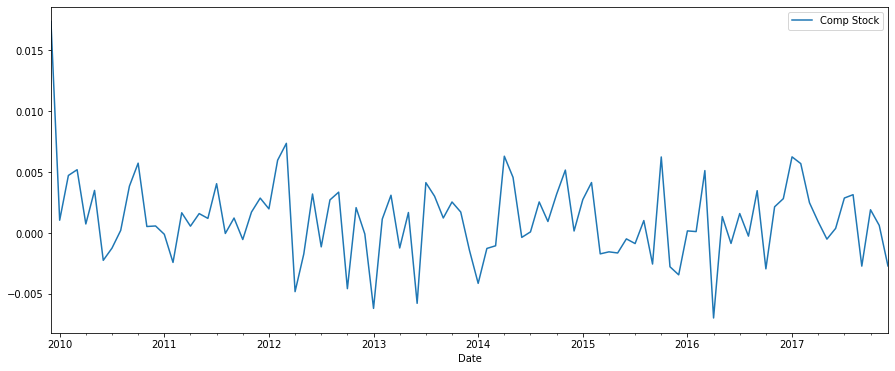

In [650]:
z.plot(figsize = (15, 6))
plt.show()

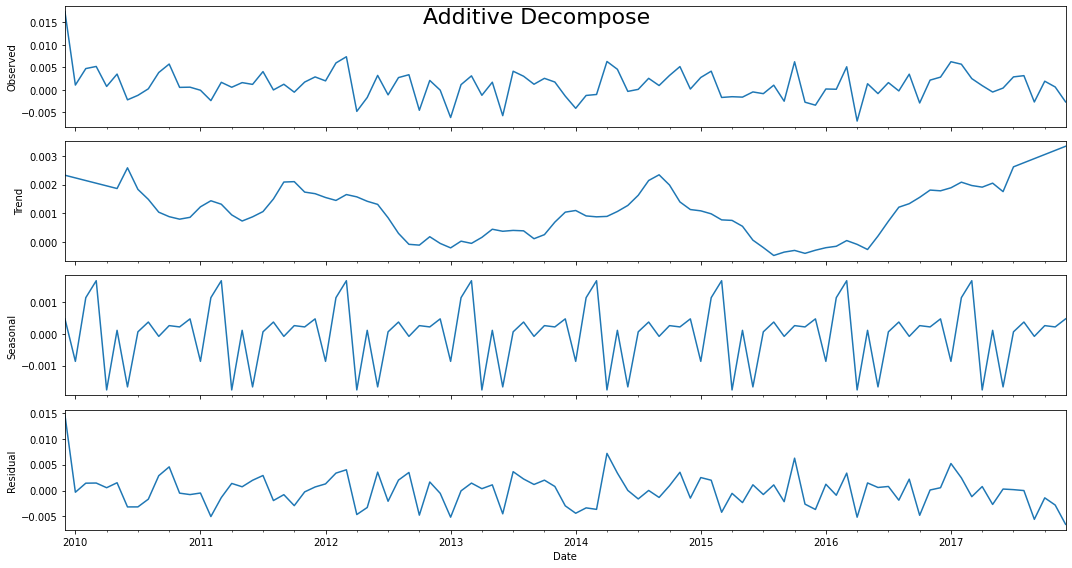

In [651]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
result_add = sm.tsa.seasonal_decompose(z['Comp Stock'], model = 'additive',extrapolate_trend='freq')
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [652]:
df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()#Doubt

,seas,trend,resid,actual_values
Date,,,,
2009-12-01,0.000480,0.002323,0.014550,0.017354
2010-01-01,-0.000865,0.002231,-0.000320,0.001046
2010-02-01,0.001152,0.002139,0.001426,0.004718
2010-03-01,0.001689,0.002047,0.001454,0.005190
2010-04-01,-0.001769,0.001955,0.000553,0.000739


In [653]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [654]:
test_result=adfuller(z['Comp Stock']) # adfuller give us 5 values

In [655]:
# just showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-11.014027675822534, 6.221646008187011e-20, 0, 96, {'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}, -735.5331926875413)


In [656]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [657]:
adfuller_test(z['Comp Stock'])

ADF Test Statistic : -11.014027675822534
p-value : 6.221646008187011e-20
#Lags Used : 0
Number of Observations Used : 96
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


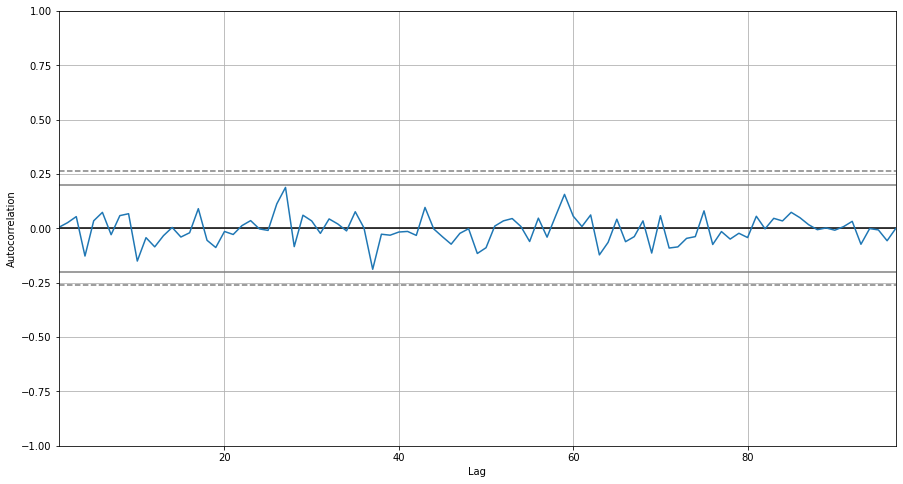

In [658]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(z['Comp Stock'])
plt.show()

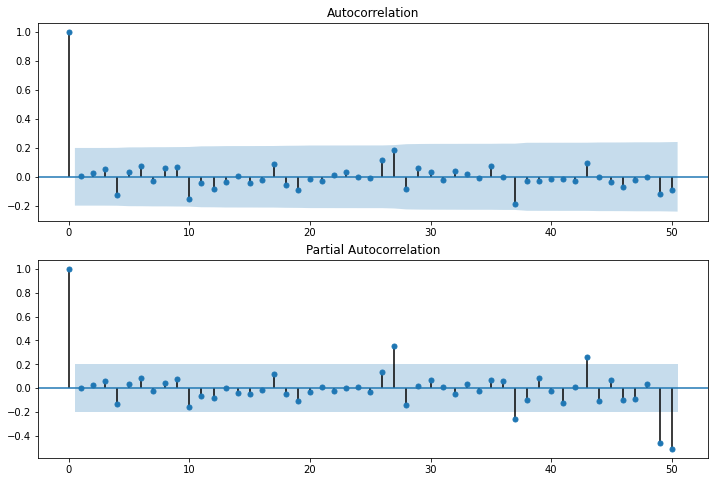

In [659]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# First 12 values are null so we will start from 13
fig = sm.graphics.tsa.plot_acf(z['Comp Stock'],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(z['Comp Stock'],lags=50,ax=ax2)

In [660]:
import itertools
# set the typical ranges for p, d, q
p = d = q = range(0, 2)
#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [661]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(z, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:-817.6322670856782
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:-815.0881674864336
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-665.4412102365511


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-692.9822673846113
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-815.6671509469927
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-813.6319125173916


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-683.6661384764676


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-687.653485572809
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-816.4734265974347
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-814.0457326278071
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-663.398164077684
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-690.8576341108435
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-814.5274775222002


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-811.6662179510474


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-681.6204682407792
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-685.5690874029556
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-765.4482296915605


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-763.7760842768744
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-605.9786043323714


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:-644.2786222080122


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-763.8602498907219


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-761.7684233747291


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-624.7981286511357


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:-643.0986563660069
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-805.3279516042047


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:-803.6860946736133
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:-650.4779668616959


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:-677.6710689307555


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:-803.709158468044


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:-801.6385805774648


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:-668.2685341160641


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:-669.1612399670056
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:-816.6756646701068
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:-814.2626259663579
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:-663.4447065941616


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:-691.0168619139745
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:-814.7315836728285
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:-812.7423518855194
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:-681.6723777436165


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:-685.674640406202
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:-819.3407439154167
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:-817.9390772285245
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:-661.6685183024164
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:-691.1079289854474
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:-817.9460481783665
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:-815.8802044498848
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:-679.6129290643208


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:-683.5666190464993
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:-787.2838667373574


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:-784.6374360359417
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:-632.6179216326427
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:-661.8420934331264
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:-785.070540659149


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:-782.6034123835029
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:-643.3872114011411


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:-649.5949628718679


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:-805.0441125057268


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:-800.574925863153


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:-644.2823409401366


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:-672.6036914724174


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-800.6375575989116
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-798.5196642137267


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:-655.8383805654016
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:-662.3344347313877


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [662]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(z, order = (0, 1, 0),
                                  seasonal_order = (0, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.199e-05   6.87e-06      6.109      0.000    2.85e-05    5.55e-05


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


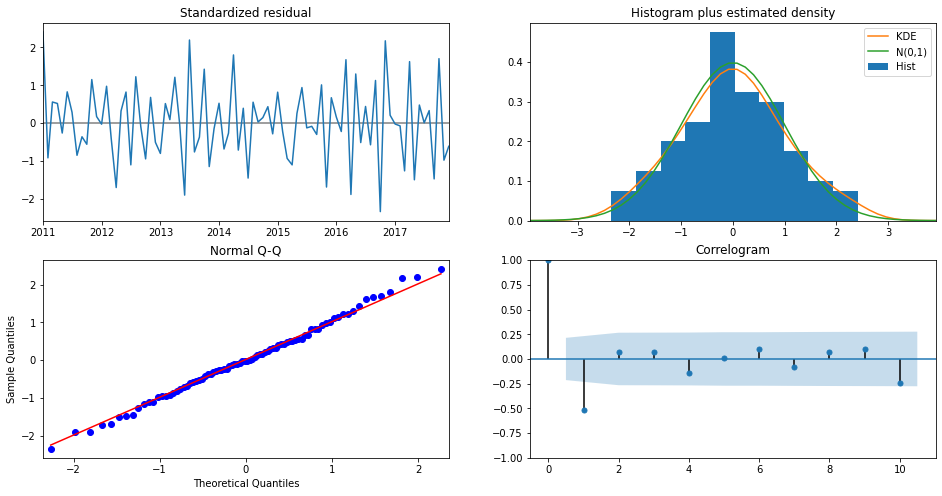

In [663]:
#run model diagnostic to investigate any unusual behavior
result.plot_diagnostics(figsize = (16, 8))
plt.show()

In [664]:
prediction = result.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower Comp Stock,upper Comp Stock
Date,,
2017-01-01,-0.006281,0.019121
2017-02-01,-0.006512,0.018890
2017-03-01,-0.002006,0.023396
2017-04-01,-0.022311,0.003091
2017-05-01,-0.003466,0.021936
2017-06-01,-0.015407,0.009995
2017-07-01,-0.009873,0.015529
2017-08-01,-0.011688,0.013714
2017-09-01,-0.005832,0.019570


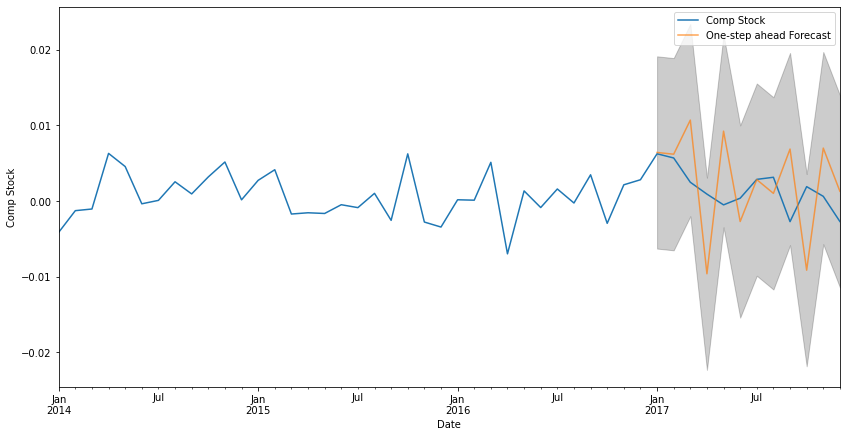

In [665]:
#Visualize the forecasting
ax = z['2014':].plot(label = 'Comp Stock')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel('Comp Stock')
plt.legend()
plt.show()

In [666]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)
z_hat = prediction.predicted_mean
z_truth = z['2017-01-01':]

mse = ((z_hat - z_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))#Doubt-2

The Mean Squared Error of our forecasts is 2017-01-01 00:00:00   NaN
2017-02-01 00:00:00   NaN
2017-03-01 00:00:00   NaN
2017-04-01 00:00:00   NaN
2017-05-01 00:00:00   NaN
2017-06-01 00:00:00   NaN
2017-07-01 00:00:00   NaN
2017-08-01 00:00:00   NaN
2017-09-01 00:00:00   NaN
2017-10-01 00:00:00   NaN
2017-11-01 00:00:00   NaN
2017-12-01 00:00:00   NaN
Comp Stock            NaN
dtype: float64
The Root Mean Squared Error of our forecasts is 2017-01-01 00:00:00   NaN
2017-02-01 00:00:00   NaN
2017-03-01 00:00:00   NaN
2017-04-01 00:00:00   NaN
2017-05-01 00:00:00   NaN
2017-06-01 00:00:00   NaN
2017-07-01 00:00:00   NaN
2017-08-01 00:00:00   NaN
2017-09-01 00:00:00   NaN
2017-10-01 00:00:00   NaN
2017-11-01 00:00:00   NaN
2017-12-01 00:00:00   NaN
Comp Stock            NaN
dtype: float64


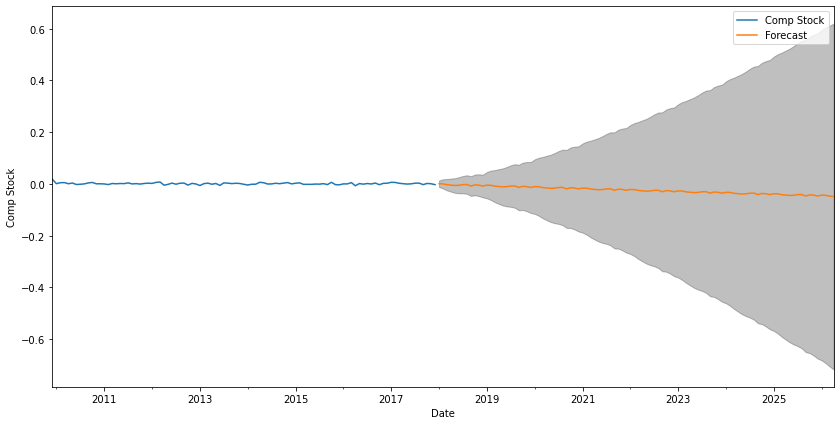

In [667]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = z.plot(label = 'Comp Stock', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Comp Stock')

plt.legend()
plt.show()
